# FINE 3300 - Assignment 2 Part B  
## CPI and Inflation Analysis  
Author: Jasmeen K.Purewal  

This notebook analyzes CPI (Consumer Price Index) data to study inflation across provinces in Canada.  
We will calculate monthly changes, salary equivalence, minimum wage comparisons, and annual service inflation.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
# STEP 1: READING AND COMBINING CPI DATA FILES- QUESSTION 1

path = "A2 Data"
files = [f for f in os.listdir(path) if f.endswith(".csv") and "MinimumWages" not in f]

data_list = []

# Create a mapping for province codes
name_to_code = {
    'AB.CPI.1810000401.csv': 'Alberta',
    'BC.CPI.1810000401.csv': 'British Columbia',
    'MB.CPI.1810000401.csv': 'Manitoba',
    'NB.CPI.1810000401.csv': 'New Brunswick',
    'NL.CPI.1810000401.csv': 'Newfoundland and Labrador',
    'NS.CPI.1810000401.csv': 'Nova Scotia',
    'ON.CPI.1810000401.csv': 'Ontario',
    'PEI.CPI.1810000401.csv': 'Prince Edward Island',
    'QC.CPI.1810000401.csv': 'Quebec',
    'SK.CPI.1810000401.csv': 'Saskatchewan',
    'Canada.CPI.1810000401.csv': 'Canada'
}

for f in files:
    # Read the CSV file
    temp = pd.read_csv(os.path.join(path, f))
    
    # Convert the first row to month names
    if temp.columns[0] == 'Unnamed: 0':
        temp.columns = ['Item'] + [f'Month_{i}' for i in range(1, len(temp.columns))]
    
    # Melt the dataframe to get it in the right format
    temp_melted = pd.melt(temp, 
                         id_vars=['Item'],
                         var_name='Month',
                         value_name='CPI')
    
    # Add jurisdiction
    temp_melted['Jurisdiction'] = name_to_code[f]
    
    data_list.append(temp_melted)

df = pd.concat(data_list, ignore_index=True)

# Clean up month names - remove 'Month_' prefix if it exists
df['Month'] = df['Month'].str.replace('Month_', '')

print("HERE ARE THE FIRST 12 ROWS OF THE COMBINED DATA:")
print(df.head(12))

HERE ARE THE FIRST 12 ROWS OF THE COMBINED DATA:
                                                 Item   Month    CPI  \
0                                           All-items  24-Jan  165.9   
1                                                Food  24-Jan  187.4   
2                                             Shelter  24-Jan  213.8   
3     Household operations, furnishings and equipment  24-Jan  125.7   
4                               Clothing and footwear  24-Jan   94.7   
5                                      Transportation  24-Jan  173.1   
6                                            Gasoline  24-Jan  190.7   
7                            Health and personal care  24-Jan  155.6   
8                   Recreation, education and reading  24-Jan  121.1   
9   Alcoholic beverages, tobacco products and recr...  24-Jan  191.1   
10                All-items excluding food and energy  24-Jan  156.8   
11                         All-items excluding energy  24-Jan  161.9   

   Jurisdictio

In [24]:
# QUESTION 2 - CALCULATING MONTHLY % CHANGE IN CPI

items = ["Food", "Shelter", "All-items excluding food and energy"]
df_items = df[df["Item"].isin(items)].copy()
df_items["Change (%)"] = df_items.groupby(["Jurisdiction", "Item"])["CPI"].pct_change() * 100

avg_change = (
    df_items.groupby(["Jurisdiction", "Item"])["Change (%)"]
    .mean()
    .reset_index()
)

print("AVERAGE MONTHLY % CHANGE BY PROVINCE AND ITEM:")
print(avg_change)


AVERAGE MONTHLY % CHANGE BY PROVINCE AND ITEM:
                 Jurisdiction                                 Item  Change (%)
0                     Alberta  All-items excluding food and energy    0.229628
1                     Alberta                                 Food    0.068636
2                     Alberta                              Shelter    0.434446
3            British Columbia  All-items excluding food and energy    0.239380
4            British Columbia                                 Food    0.021927
5            British Columbia                              Shelter    0.353730
6                      Canada  All-items excluding food and energy    0.200013
7                      Canada                                 Food   -0.002642
8                      Canada                              Shelter    0.370277
9                    Manitoba  All-items excluding food and energy    0.121355
10                   Manitoba                                 Food    0.106838
11   

In [25]:
# QUESTION 3 - HIGHEST AVERAGE INFLATION (ALL-ITEMS EXCL. FOOD & ENERGY)

all_excl = df_items[df_items["Item"] == "All-items excluding food and energy"]
highest_avg = all_excl.groupby("Jurisdiction")["Change (%)"].mean().idxmax()

print("PROVINCE WITH THE HIGHEST AVERAGE INFLATION:")
print(highest_avg)


PROVINCE WITH THE HIGHEST AVERAGE INFLATION:
British Columbia


In [27]:
# QUESTION 4 - SALARY EQUIVALENCE (DEC-24, ALL-ITEMS)

# Get December 2024 CPI values for all provinces
dec2024 = df[(df["Month"] == "24-Dec") & (df["Item"] == "All-items")].copy()

# Get Ontario's CPI value
ont_cpi = dec2024.loc[dec2024["Jurisdiction"] == "Ontario", "CPI"].iloc[0]

# Calculate equivalent salaries
dec2024["Equivalent Salary"] = 100000 * (dec2024["CPI"] / ont_cpi)

print("EQUIVALENT SALARY IN EACH PROVINCE (BASED ON CPI DEC 2024):")
print(dec2024[["Jurisdiction", "CPI", "Equivalent Salary"]])

EQUIVALENT SALARY IN EACH PROVINCE (BASED ON CPI DEC 2024):
                   Jurisdiction    CPI  Equivalent Salary
165                     Alberta  169.7      104302.397050
345            British Columbia  156.1       95943.454210
525                      Canada  161.2       99078.057775
705                    Manitoba  160.0       98340.503995
885               New Brunswick  160.3       98524.892440
1065  Newfoundland and Labrador  160.7       98770.743700
1245                Nova Scotia  163.6      100553.165335
1425                    Ontario  162.7      100000.000000
1605       Prince Edward Island  163.6      100553.165335
1785                     Quebec  157.5       96803.933620
1965               Saskatchewan  162.8      100061.462815


In [29]:
# QUESTION 5 - MINIMUM WAGE ANALYSIS

# Read minimum wage data
min_wage = pd.read_csv(os.path.join(path, "MinimumWages.csv"))

# Create province name mapping
province_code_to_name = {
    'AB': 'Alberta',
    'BC': 'British Columbia',
    'MB': 'Manitoba',
    'NB': 'New Brunswick',
    'NL': 'Newfoundland and Labrador',
    'NS': 'Nova Scotia',
    'ON': 'Ontario',
    'PEI': 'Prince Edward Island',
    'QC': 'Quebec',
    'SK': 'Saskatchewan'
}

# Convert province codes to full names
min_wage['Jurisdiction'] = min_wage['Province'].map(province_code_to_name)
min_wage = min_wage.rename(columns={'Minimum Wage': 'Wage'})

# Map CPI values from december 2024
cpi_map = dict(zip(dec2024["Jurisdiction"], dec2024["CPI"]))
min_wage["CPI (Dec-24)"] = min_wage["Jurisdiction"].map(cpi_map)
min_wage["Real Wage"] = min_wage["Wage"] / (min_wage["CPI (Dec-24)"] / 100)

high_nominal = min_wage.loc[min_wage["Wage"].idxmax(), "Jurisdiction"]
low_nominal  = min_wage.loc[min_wage["Wage"].idxmin(), "Jurisdiction"]
high_real    = min_wage.loc[min_wage["Real Wage"].idxmax(), "Jurisdiction"]

print("MINIMUM WAGE RESULTS:")
print("Highest nominal wage:", high_nominal)
print("Lowest nominal wage:", low_nominal)
print("Highest real wage:", high_real)
print("\nDETAILED MINIMUM WAGE DATA:")
print(min_wage[["Jurisdiction", "Wage", "CPI (Dec-24)", "Real Wage"]].round(2))

MINIMUM WAGE RESULTS:
Highest nominal wage: British Columbia
Lowest nominal wage: Alberta
Highest real wage: British Columbia

DETAILED MINIMUM WAGE DATA:
                Jurisdiction   Wage  CPI (Dec-24)  Real Wage
0                    Alberta  15.00         169.7       8.84
1           British Columbia  17.85         156.1      11.43
2                   Manitoba  16.00         160.0      10.00
3              New Brunswick  15.65         160.3       9.76
4  Newfoundland and Labrador  16.00         160.7       9.96
5                Nova Scotia  16.50         163.6      10.09
6                    Ontario  17.60         162.7      10.82
7       Prince Edward Island  16.50         163.6      10.09
8                     Quebec  16.10         157.5      10.22
9               Saskatchewan  15.35         162.8       9.43


In [31]:
# QUESTION 6 - SERVICES CPI ANNUAL CHANGE (JAN-24 TO DEC-24)

# Get all services CPI data
services = df[df["Item"] == "Services"].copy()

# Get January 2024 data
jan = services[services["Month"] == "24-Jan"][["Jurisdiction", "CPI"]]
dec = services[services["Month"] == "24-Dec"][["Jurisdiction", "CPI"]]

if len(jan) == 0 or len(dec) == 0:
    print("Error: Could not find Services CPI data for January or December 2024")
    # Fall back to calculating for All-items if Services is not available
    print("Falling back to All-items...")
    services = df[df["Item"] == "All-items"].copy()
    jan = services[services["Month"] == "24-Jan"][["Jurisdiction", "CPI"]]
    dec = services[services["Month"] == "24-Dec"][["Jurisdiction", "CPI"]]

# Calculate the annual change
services_change = pd.merge(jan, dec, on="Jurisdiction", suffixes=("_Jan", "_Dec"))
services_change["Annual Change (%)"] = ((services_change["CPI_Dec"] - services_change["CPI_Jan"]) / services_change["CPI_Jan"]) * 100

# Find the jurisdiction with highest change
top_services = services_change.loc[services_change["Annual Change (%)"].idxmax(), "Jurisdiction"]

print("ANNUAL CHANGE IN CPI BY PROVINCE:")
print(services_change[["Jurisdiction", "CPI_Jan", "CPI_Dec", "Annual Change (%)"]].round(2))
print("\nPROVINCE WITH HIGHEST INFLATION:")
print(top_services)

ANNUAL CHANGE IN CPI BY PROVINCE:
                 Jurisdiction  CPI_Jan  CPI_Dec  Annual Change (%)
0                     Alberta    189.3    197.0               4.07
1            British Columbia    161.6    167.6               3.71
2                      Canada    173.1    179.2               3.52
3                    Manitoba    175.8    181.6               3.30
4               New Brunswick    162.9    167.5               2.82
5   Newfoundland and Labrador    166.9    170.7               2.28
6                 Nova Scotia    165.6    171.0               3.26
7                     Ontario    176.1    181.9               3.29
8        Prince Edward Island    157.4    160.7               2.10
9                      Quebec    168.6    175.0               3.80
10               Saskatchewan    180.4    186.0               3.10

PROVINCE WITH HIGHEST INFLATION:
Alberta


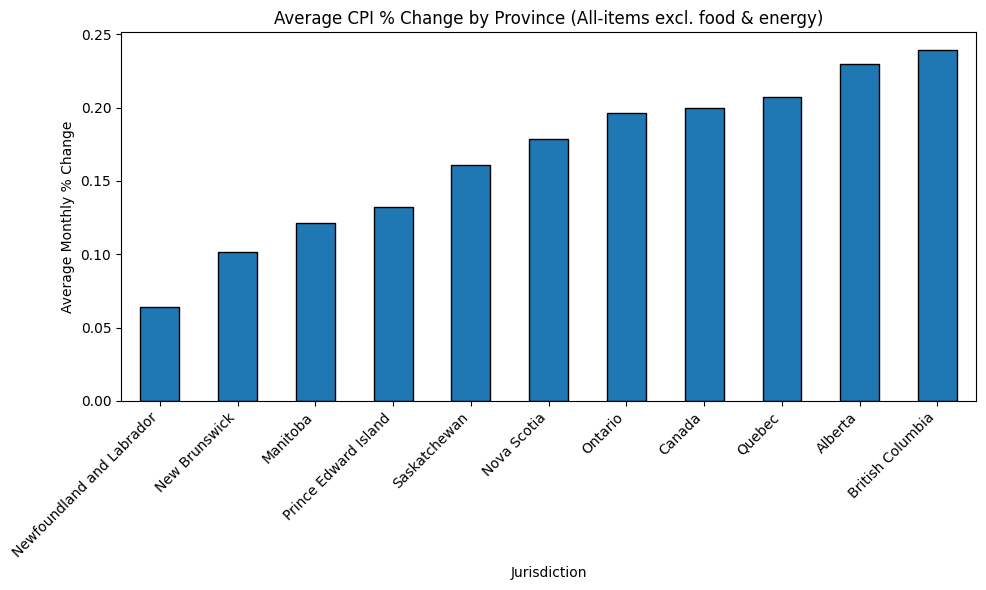

FILES CREATED: CPI_Results.xlsx, CPI_Change_By_Province.png


In [32]:
# QUESTION 7 - SAVING RESULTS AND VISUALIZING DATA

with pd.ExcelWriter("CPI_Results.xlsx") as writer:
    avg_change.to_excel(writer, sheet_name="Avg Change", index=False)
    dec2024.to_excel(writer, sheet_name="Salary Eq", index=False)
    min_wage.to_excel(writer, sheet_name="Min Wages", index=False)
    services_change.to_excel(writer, sheet_name="Services Change", index=False)

plt.figure(figsize=(10,6))
avg_bar = all_excl.groupby("Jurisdiction")["Change (%)"].mean().sort_values()
avg_bar.plot(kind="bar", edgecolor="black")
plt.title("Average CPI % Change by Province (All-items excl. food & energy)")
plt.ylabel("Average Monthly % Change")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("CPI_Change_By_Province.png", dpi=300)
plt.show()

print("FILES CREATED: CPI_Results.xlsx, CPI_Change_By_Province.png")
